# TOI 519.01 TESS, MuSCAT2, and LCOGT joint analysis

*Hannu Parviainen*<br>
*27.3.2020*

We model the TESS light curve together with the MuSCAT2 four-colour light curves and LCOGT light curves by subclassing the "contaminated TESS & ground based LPF" utility class `pytransit.lpf.tess.tgclpf.BaseTGCLPF`. The class contains all the major functionality for the analysis, but requires the `_read_data` method to be implemented. The final analysis class is implemented in `toi_519.py`.

**Contamination:** The model allows for unconstrained contamination on the TESS light curve, and an independent physically modelled contamination to the MuSCAT2 light curves. This is because the TESS PSF is significantly larger than the MuSCAT2, and the photometry apertures of the two will have very different amounts of flux contamination from the nearby stars. TOI 519 doesn't have any resolved nearby stars in the MuSCAT2 photometry, and the multicolour photometry can be used to probe the existense of possible non-resolved contaminants.

**Baseline model:** The model uses a linear baseline model (the baseline flux is modelled as a weighted sum of a set of per-transit covariates) for ground-based observations.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run toi_519.py

### Initialise the LPF and set the priors

The `LPF` initialises the priors for the transit centre and orbital period automatically using the `zero_epoch` and `period` estimates given as initialisation arguments. However, the default prior for the apparent radius ratio, `k2_app`, is too narrow, and needs to be set.

In [3]:
lpf = LPF('toi_519.01_tess_and_gb', use_opencl=True)

### Optimisation

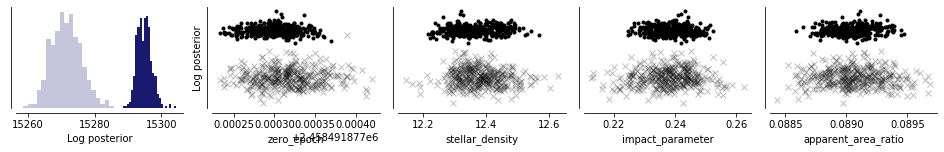

In [11]:
lpf.optimize_global(250, npop=400)

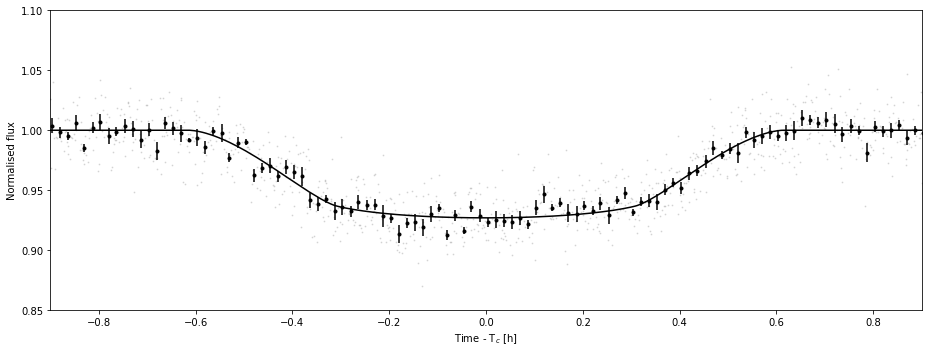

In [12]:
fig = lpf.plot_folded_tess_transit(solution='global', figsize=(13,5), xlim=(-0.9, 0.9), ylim=(0.85, 1.1))

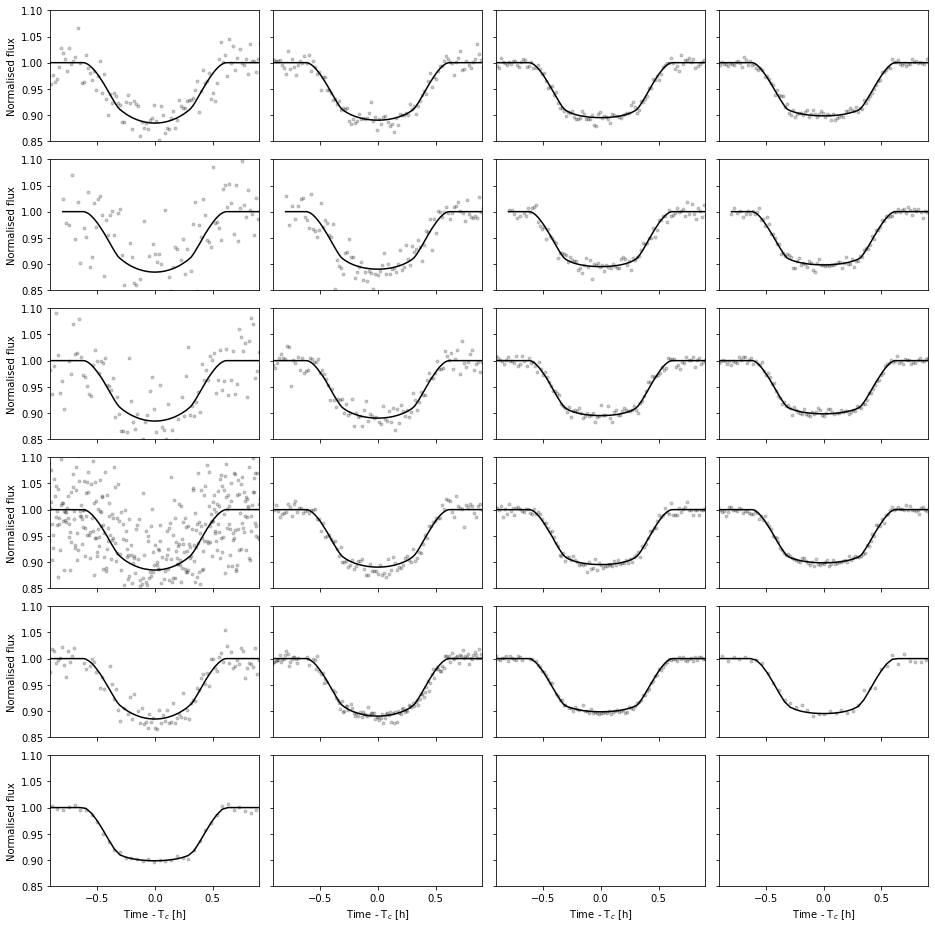

In [13]:
fig = lpf.plot_gb_transits(solution='global', ncol=4, figsize=(13,13), xlim=(-0.9, 0.9), ylim=(0.85, 1.1))

## Sample the posterior

### Warm-up phase

Sample the posterior using *emcee*. This is going to take some time (~1 h with a modern MacBook Pro), so better find some other ways to entertain yourself than watching the progress bar.

In [19]:
lpf.sample_mcmc(5000, 25, repeats=10, save=True)

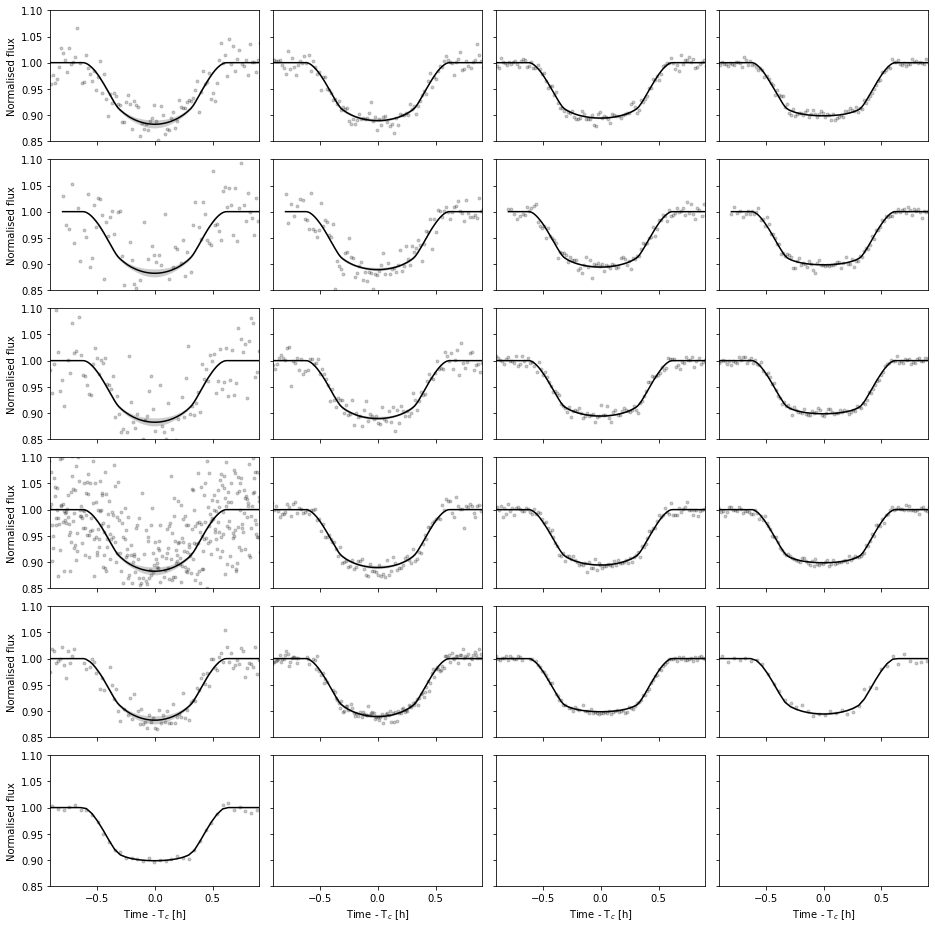

In [30]:
fig = lpf.plot_gb_transits(solution='mcmc', ncol=4, figsize=(13,13), xlim=(-0.9, 0.9), ylim=(0.85, 1.1))

### Final posterior samples

In [33]:
lpf.sample_mcmc(60000, 150, repeats=2, save=True)

---

<center>© 2020 Hannu Parviainen</center>